In [ ]:
import keras
from keras import Input
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt
from keras import backend as K
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

## Deep Autoencoder


In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
(x_train,_)= load_data()
x_train = np.array([x.flatten() for x in x_train])
x_train[0].shape

(4096,)

In [ ]:
dim=64

In [ ]:
input_img = Input(shape=(dim*dim,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(dim*dim, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='RMSprop', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=50,
                shuffle=True,
                validation_split=0.1
                verbose=0)

7/7 [==============================] - 0s 6ms/step - loss: -199053626587480064.0000 - val_loss: -199092470271705088.0000
Epoch 855/1000
7/7 [==============================] - 0s 7ms/step - loss: -199234187012603904.0000 - val_loss: -199273116596174848.0000
Epoch 856/1000
7/7 [==============================] - 0s 7ms/step - loss: -199414987955896320.0000 - val_loss: -199453986258944000.0000
Epoch 857/1000
7/7 [==============================] - 0s 6ms/step - loss: -199595891978403840.0000 - val_loss: -199634752842498048.0000
Epoch 858/1000
7/7 [==============================] - 0s 6ms/step - loss: -199776813180780544.0000 - val_loss: -199815759944220672.0000
Epoch 859/1000
7/7 [==============================] - 0s 8ms/step - loss: -199957992081195008.0000 - val_loss: -199996852945289216.0000
Epoch 860/1000
7/7 [==============================] - 0s 6ms/step - loss: -200139188161478656.0000 - val_loss: -200178134924918784.0000
Epoch 861/1000
7/7 [==============================] - 0s 6ms/st

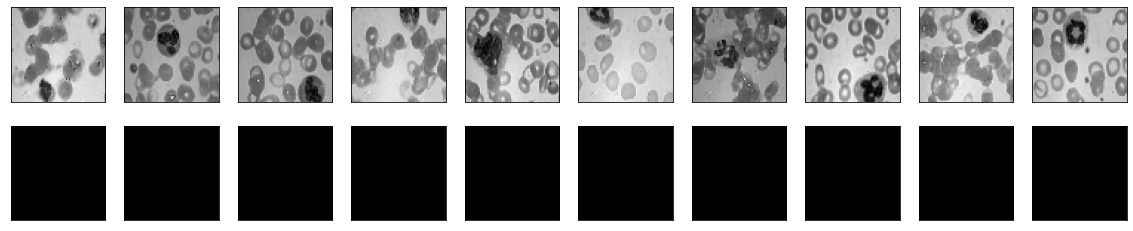

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
decoded_imgs = autoencoder.predict(x_train)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64)*255)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
decoded_imgs[0]